### Importing required libraries

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

### Loading dataset

In [2]:
path="C:/Users/argodoy/Documents/Personal_Files/Machine_Learning_October2023/Datathon_2023/Dataset/"
file="bosch_aic_datathon.xlsx"
comp_path=path+file
df=pd.read_excel(comp_path,index_col=0)
df

,Area,Á.liq.,Grupo de personal,CODIGO POSTAL,Motivo de la RENUNCIA,Banda,Baja,ReglaPHT,Alta,Años,Meses,Antigüedad,Clave de sexo,Lugar de nacimiento,Nacionalidad,Edad del empleado,¿Cuanto tiempo tiene viviendo en Cd. Juarez?,Estado Civil,Hijos
Posición,,,,,,,,,,,,,,,,,,,
POS514,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,2023-01-02,ADMINIST,2018-06-21,5,55.200000,1656,Femenino,JUAREZ,Mexican,31,NaN,solter,0
POS1745,MFS,S5,Direct,32217,Vol-Otro empleo,DNO,2023-01-03,ADMINIST,2017-07-20,6,66.433333,1993,Masculino,DURANGO,Mexican,25,10+ Years,solter,0
POS1230,VS7,S5,Direct,32600,Vol-Otro empleo,DNO,2023-01-03,JT012324,2019-08-29,4,40.766667,1223,Masculino,JUAREZ,Mexican,23,10+ Years,solter,0
POS1661,MFS,S5,Direct,32575,Vol-Estudios,DO,2023-01-03,JT012324,2022-11-03,1,2.033333,61,Femenino,CIUDAD JUAREZ,Mexican,18,10+ Years,solter,0
POS1921,MFS,S5,Direct,32575,Vol-Cambio de domicilio,DO,2023-01-03,JT012324,2017-03-02,6,71.100000,2133,Masculino,JUAREZ,Mexican,26,10+ Years,solter,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POS790,QMM,S6,Exempt,32585,Vol-Transferencia entre planta,E4,2022-12-31,ADMINIST,2011-09-12,11,137.600000,4128,Masculino,MEXICO DF,Mexican,44,NaN,casad.,0
POS2802,TEF,S5,Direct,32575,Vol-Cambio de domicilio,DNO,2022-07-26,JT012324,2015-08-05,7,84.900000,2547,Masculino,JUAREZ,Mexican,28,NaN,solter,0
POS538,VS7,S5,Direct,32575,Vol-No regreso / no dio razón,DNO,2022-09-02,JT031800,2022-07-21,0,1.433333,43,Femenino,CHIHUAHUA,Mexican,21,NaN,solter,0


###  Get Dataset Size

In [3]:
df.shape

(1403, 19)

### Identify column names

In [4]:
cols=df.columns
cols

Index(['Area', 'Á.liq.', 'Grupo de personal', 'CODIGO POSTAL',
       'Motivo de la RENUNCIA', 'Banda', 'Baja', 'ReglaPHT', 'Alta', 'Años',
       'Meses', 'Antigüedad', 'Clave de sexo', 'Lugar de nacimiento',
       'Nacionalidad', 'Edad del empleado',
       '¿Cuanto tiempo tiene viviendo en Cd. Juarez?', 'Estado Civil',
       'Hijos'],
      dtype='object')

### Get Dataset Variable Types

In [5]:
df.dtypes

Area                                                    object
Á.liq.                                                  object
Grupo de personal                                       object
CODIGO POSTAL                                            int64
Motivo de la RENUNCIA                                   object
Banda                                                   object
Baja                                            datetime64[ns]
ReglaPHT                                                object
Alta                                            datetime64[ns]
Años                                                     int64
Meses                                                  float64
Antigüedad                                               int64
Clave de sexo                                           object
Lugar de nacimiento                                     object
Nacionalidad                                            object
Edad del empleado                                      

###  Creating a column with index values "Posicion"

In [6]:
df.reset_index(level=0, inplace=True) 
df

,Posición,Area,Á.liq.,Grupo de personal,CODIGO POSTAL,Motivo de la RENUNCIA,Banda,Baja,ReglaPHT,Alta,Años,Meses,Antigüedad,Clave de sexo,Lugar de nacimiento,Nacionalidad,Edad del empleado,¿Cuanto tiempo tiene viviendo en Cd. Juarez?,Estado Civil,Hijos
0,POS514,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,2023-01-02,ADMINIST,2018-06-21,5,55.200000,1656,Femenino,JUAREZ,Mexican,31,NaN,solter,0
1,POS1745,MFS,S5,Direct,32217,Vol-Otro empleo,DNO,2023-01-03,ADMINIST,2017-07-20,6,66.433333,1993,Masculino,DURANGO,Mexican,25,10+ Years,solter,0
2,POS1230,VS7,S5,Direct,32600,Vol-Otro empleo,DNO,2023-01-03,JT012324,2019-08-29,4,40.766667,1223,Masculino,JUAREZ,Mexican,23,10+ Years,solter,0
3,POS1661,MFS,S5,Direct,32575,Vol-Estudios,DO,2023-01-03,JT012324,2022-11-03,1,2.033333,61,Femenino,CIUDAD JUAREZ,Mexican,18,10+ Years,solter,0
4,POS1921,MFS,S5,Direct,32575,Vol-Cambio de domicilio,DO,2023-01-03,JT012324,2017-03-02,6,71.100000,2133,Masculino,JUAREZ,Mexican,26,10+ Years,solter,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,POS790,QMM,S6,Exempt,32585,Vol-Transferencia entre planta,E4,2022-12-31,ADMINIST,2011-09-12,11,137.600000,4128,Masculino,MEXICO DF,Mexican,44,NaN,casad.,0
1399,POS2802,TEF,S5,Direct,32575,Vol-Cambio de domicilio,DNO,2022-07-26,JT012324,2015-08-05,7,84.900000,2547,Masculino,JUAREZ,Mexican,28,NaN,solter,0
1400,POS538,VS7,S5,Direct,32575,Vol-No regreso / no dio razón,DNO,2022-09-02,JT031800,2022-07-21,0,1.433333,43,Femenino,CHIHUAHUA,Mexican,21,NaN,solter,0
1401,POS538,VS9-ABS,S5,Direct,32600,Imp.Tra-Ausentismos continuos,DNO,2022-09-02,JT031800,2017-03-30,5,66.066667,1982,Femenino,VERACRUZ,Mexican,45,NaN,U.Libr,2


### Replacing column names to make them uniform

In [7]:
df.rename(columns = {
    'Á.liq.':'Aliquido', 'Grupo de personal':'Grupo_de_personal', 'CODIGO POSTAL':'Codigo_postal',
    'Motivo de la RENUNCIA':'Motivo_renuncia','ReglaPHT':'Reglapht', 'Años':'Anios', 'Antigüedad':'Antiguedad',
    'Clave de sexo':'Sexo', 'Lugar de nacimiento':'Lugar_de_nacimiento', 'Edad del empleado':'Edad',
    '¿Cuanto tiempo tiene viviendo en Cd. Juarez?':'Viviendo_en_juarez', 'Estado Civil':'Estado_civil','Posición':'Posicion'
    }, inplace = True)

In [8]:
cols=df.columns
cols

Index(['Posicion', 'Area', 'Aliquido', 'Grupo_de_personal', 'Codigo_postal',
       'Motivo_renuncia', 'Banda', 'Baja', 'Reglapht', 'Alta', 'Anios',
       'Meses', 'Antiguedad', 'Sexo', 'Lugar_de_nacimiento', 'Nacionalidad',
       'Edad', 'Viviendo_en_juarez', 'Estado_civil', 'Hijos'],
      dtype='object')

### Get Dataset Statistics

In [9]:
df.describe()

,Codigo_postal,Anios,Meses,Antiguedad,Edad,Hijos
count,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000,1403.000000
mean,32550.890948,4.192445,48.848373,1465.451176,30.941554,1.132573
std,1740.667827,4.650099,54.076010,1622.280304,9.734537,1.302182
min,3259.000000,0.000000,0.166667,5.000000,18.000000,0.000000
25%,32575.000000,1.000000,5.766667,173.000000,24.000000,0.000000
50%,32575.000000,3.000000,32.600000,978.000000,28.000000,1.000000
75%,32599.000000,6.000000,71.100000,2133.000000,36.000000,2.000000
max,75116.000000,29.000000,351.733333,10552.000000,67.000000,6.000000


### Identify unique values

In [10]:
for col in df:
  print("The column ", col, "has the following unique values:", df[col].unique(), "\n")

The column  Posicion has the following unique values: ['POS514' 'POS1745' 'POS1230' 'POS1661' 'POS1921' 'POS2803' 'POS538'
 'POS1380' 'POS2094' 'POS2003' 'POS347' 'POS1376' 'POS1323' 'POS2939'
 'POS581' 'POS1657' 'POS2384' 'POS2553' 'POS2802' 'POS2076' 'POS2046'
 'POS2856' 'POS1683' 'POS750' 'POS907' 'POS2745' 'POS1884' 'POS2858'
 'POS1559' 'POS841' 'POS2167' 'POS2817' 'POS1373' 'POS1788' 'POS343'
 'POS2847' 'POS970' 'POS977' 'POS2456' 'POS1111' 'POS2718' 'POS1227'
 'POS2062' 'POS1116' 'POS251' 'POS454' 'POS1010' 'POS1181' 'POS2988'
 'POS1056' 'POS1974' 'POS213' 'POS1365' 'POS2224' 'POS1845' 'POS1203'
 'POS2338' 'POS1439' 'POS500' 'POS1783' 'POS1702' 'POS1748' 'POS2622'
 'POS1488' 'POS780' 'POS1210' 'POS124' 'POS1667' 'POS1410' 'POS2915'
 'POS96' 'POS698' 'POS139' 'POS1520' 'POS1819' 'POS2913' 'POS1448'
 'POS2497' 'POS2698' 'POS1145' 'POS2848' 'POS723' 'POS1100' 'POS2756'
 'POS60' 'POS2567' 'POS101' 'POS2729' 'POS1133' 'POS2427' 'POS2597'
 'POS706' 'POS2821' 'POS1359' 'POS2446' 'POS790

### Obtain Count of Unique Elements per Variable

In [11]:
for col in df:
    print("\n\n Columna: ",col,"\n")
    print(df[col].value_counts(dropna=False))



 Columna:  Posicion 

POS1323    329
POS538     205
POS2939    124
POS1921    109
POS1230     82
          ... 
POS970       1
POS698       1
POS2167      1
POS2913      1
POS2562      1
Name: Posicion, Length: 97, dtype: int64


 Columna:  Area 

VS9-ABS       320
MFS           286
VS7           192
VS5           132
VS1           123
LOG            97
TEF            88
VS4            88
VS1-HOUS       27
QMM            19
HRL            10
CTG             8
DBE             5
HSE             5
Admin MSE2      2
Admin MSE1      1
Name: Area, dtype: int64


 Columna:  Aliquido 

S5    1249
S6     154
Name: Aliquido, dtype: int64


 Columna:  Grupo_de_personal 

Direct        1231
Exempt         139
Indirect        18
Managers        13
Non-Exempt       2
Name: Grupo_de_personal, dtype: int64


 Columna:  Codigo_postal 

32575    526
32599    199
32590     77
32600     55
32695     43
        ... 
32424      1
32360      1
32687      1
32140      1
32677      1
Name: Codigo_postal, Len

### Identify NaN values

In [12]:
# Counting NaN values in all columns
nan_count = df.isna().sum()

print(nan_count)

Posicion                 0
Area                     0
Aliquido                 0
Grupo_de_personal        0
Codigo_postal            0
Motivo_renuncia          0
Banda                    1
Baja                     0
Reglapht                 0
Alta                     0
Anios                    0
Meses                    0
Antiguedad               0
Sexo                     0
Lugar_de_nacimiento      2
Nacionalidad             0
Edad                     0
Viviendo_en_juarez     786
Estado_civil            10
Hijos                    0
dtype: int64


##  Data Cleaning

## Eliminating NaNs

### Assigning value "DO" to NaN in Column "Banda"

In [13]:
df['Banda'].replace(np.NaN, "DO", inplace=True)

### Assigning value "Juarez" to NaNs in Column "Lugar_de_nacimiento"

In [14]:
df['Lugar_de_nacimiento'].replace(np.NaN, "Juarez", inplace=True)

### Assigning value "No_Reportado" to NaNs in Column "Viviendo_en_juarez"

In [15]:
df['Viviendo_en_juarez'].replace(np.NaN, "No_Reportado", inplace=True)

### Assigning value "No_Reportado" to NaNs in Column "Estado_civil"

In [16]:
df['Estado_civil'].replace(np.NaN, "No_Reportado", inplace=True)

In [17]:
# Counting NaN values in all columns
nan_count = df.isna().sum()

print(nan_count)

Posicion               0
Area                   0
Aliquido               0
Grupo_de_personal      0
Codigo_postal          0
Motivo_renuncia        0
Banda                  0
Baja                   0
Reglapht               0
Alta                   0
Anios                  0
Meses                  0
Antiguedad             0
Sexo                   0
Lugar_de_nacimiento    0
Nacionalidad           0
Edad                   0
Viviendo_en_juarez     0
Estado_civil           0
Hijos                  0
dtype: int64


### Eliminating Column "Nacionalidad"

In [18]:
df.drop("Nacionalidad", axis=1, inplace=True)

## Grouping Similar Values on Columns

### Creating Common Names for "Motivo_renuncia"

In [19]:

df['Motivo_renuncia'].replace(['Imp.Tra-LFT y/o Reglamento Int.','Imp.Tra-LFT y/o Reglamento int',
                               'Imp.Tra-Falsificación de doctos.','Imp.Tra-Falsificación de docto',
                               'Imp.Pat-Terminación del Contrato','Imp.Pat-Terminación del contra'],
                              ['Imp.Tra-LFT_Reglamento_Interno','Imp.Tra-LFT_Reglamento_Interno',
                               'Imp.Tra-Falsificación_documentos','Imp.Tra-Falsificación_documentos',
                               'Imp.Pat-Terminación_contrato',  'Imp.Pat-Terminación_contrato'], inplace=True)

print(df['Motivo_renuncia'].value_counts(dropna=False))

Vol-Otro empleo                     308
Vol-Transferencia entre planta      237
Vol-No regreso / no dio razón       218
Vol-Prob personales y/o fam.        197
Vol-Insatisfacción personal          94
Vol-Cambio de domicilio              89
Imp.Tra-Ausentismos continuos        71
Vol-Estudios                         68
Imp.Tra-Jubilación                   33
Vol-Razones médicas                  28
Imp.Tra-LFT_Reglamento_Interno       24
Imp.Pat-Pensionado IMSS               8
Imp.Pat-Terminación_contrato          8
Imp.Tra-Falsificación_documentos      4
Vol-Maternidad                        3
Imp.Tra-Bajo desempeño                3
Muerte Natural                        3
Muerte Accidental                     2
Vol-Ambiente de trabajo               1
Vol-Matrimonio                        1
Imp.Tra-Uso de drogas y/o bebi        1
Vol-Problemas con transporte          1
Imp.Pat-Varios Jubilado               1
Name: Motivo_renuncia, dtype: int64


### Creating Common Names for "Lugar_de_nacimiento"

In [20]:
lugares=['AGUSCALIENTES','VILLA AHUMADA','AHOME','ANGEL R CABADA','ARRIAGA','ATLANTA','CAJEME',
         'CD JUAREZ', 'CD JUAREZ CHIH', 'CD. JUAREZ', 'CD JUAREZ CHIH.','CD. JUAREZ CHIH.', 'CD. JUAREZ CHIH',
         'CD. JUAREZ, CHIH','CD. JUAREZ CHIH.','CD. JUAREZ, CHIHUAHUA', 'CIUDAD JUAREZ',
         'CHIHUAHUA CHI.', 'CHIHUAHUA CHIH.', 'COAHILA', 'COAHUILA DE ZARAGOZA',
         'CHOAPAM']
    

lugar_corr=['AGUASCALIENTES','AHUMADA','SINALOA','VERACRUZ', 'CHIAPAS','USA','SONORA',
            'JUAREZ', 'JUAREZ', 'JUAREZ', 'JUAREZ','JUAREZ', 'JUAREZ',
            'JUAREZ','JUAREZ','JUAREZ', 'JUAREZ', 'CHIHUAHUA', 'CHIHUAHUA', 'COAHUILA', 'COAHUILA','OAXACA']
df['Lugar_de_nacimiento'].replace(lugares, lugar_corr, inplace=True)

### Creating Common Names for "Viviendo_en_juarez"

In [21]:
df['Viviendo_en_juarez'].replace([np.nan,'61-90 Days','91-180 Days','1-2 Years ','2-3 Years','3-4 Years', 
                                '4-5 Years',4,'5-6 Years',5,'6-7 Years','6 Years',
                                '7-8 Years',7,'8-9 Years','8','9-10 Years','9',
                               '10+ Years',10,'10 years', 16, 19,21,25,'25 years','26 years'],
                              ['No_reportado','Menos_de_uno','Menos_de_uno', 'Entre_1_y_2','Entre_2_y_3','Entre_3_y_4',
                               'Entre_4_y_5','Entre_4_y_5','Entre_5_y_6','Entre_5_y_6','Entre_6_y_7','Entre_6_y_7',
                               'Entre_7_y_8','Entre_7_y_8','Entre_8_y_9','Entre_8_y_9','Entre_9_y_10','Entre_9_y_10',
                               '10_o_mas','10_o_mas','10_o_mas','10_o_mas','10_o_mas','10_o_mas','10_o_mas','10_o_mas','10_o_mas'
                               ], inplace=True)

print(df['Viviendo_en_juarez'].value_counts(dropna=False))
#df['Viviendo_en_juarez'].unique()

No_Reportado    786
10_o_mas        487
Entre_3_y_4      27
Entre_9_y_10     20
Entre_5_y_6      16
Entre_8_y_9      15
Entre_6_y_7      15
Entre_7_y_8      13
Entre_2_y_3      13
Entre_1_y_2       7
Menos_de_uno      2
Entre_4_y_5       2
Name: Viviendo_en_juarez, dtype: int64


### Creating Common Names for "Estado Civil"

In [22]:

df['Estado_civil'].replace(['solter','Solter','casad.','Casad.','divorc','Divorc', 'Sep.','U.Libr','Concu.','viud.'],
                           ['Soltero','Soltero','Casado','Casado', 'Divorciado',  'Divorciado', 'Divorciado','Union_Libre','Union_Libre','Viudo'], inplace=True)

df

,Posicion,Area,Aliquido,Grupo_de_personal,Codigo_postal,Motivo_renuncia,Banda,Baja,Reglapht,Alta,Anios,Meses,Antiguedad,Sexo,Lugar_de_nacimiento,Edad,Viviendo_en_juarez,Estado_civil,Hijos
0,POS514,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,2023-01-02,ADMINIST,2018-06-21,5,55.200000,1656,Femenino,JUAREZ,31,No_Reportado,Soltero,0
1,POS1745,MFS,S5,Direct,32217,Vol-Otro empleo,DNO,2023-01-03,ADMINIST,2017-07-20,6,66.433333,1993,Masculino,DURANGO,25,10_o_mas,Soltero,0
2,POS1230,VS7,S5,Direct,32600,Vol-Otro empleo,DNO,2023-01-03,JT012324,2019-08-29,4,40.766667,1223,Masculino,JUAREZ,23,10_o_mas,Soltero,0
3,POS1661,MFS,S5,Direct,32575,Vol-Estudios,DO,2023-01-03,JT012324,2022-11-03,1,2.033333,61,Femenino,JUAREZ,18,10_o_mas,Soltero,0
4,POS1921,MFS,S5,Direct,32575,Vol-Cambio de domicilio,DO,2023-01-03,JT012324,2017-03-02,6,71.100000,2133,Masculino,JUAREZ,26,10_o_mas,Soltero,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,POS790,QMM,S6,Exempt,32585,Vol-Transferencia entre planta,E4,2022-12-31,ADMINIST,2011-09-12,11,137.600000,4128,Masculino,MEXICO DF,44,No_Reportado,Casado,0
1399,POS2802,TEF,S5,Direct,32575,Vol-Cambio de domicilio,DNO,2022-07-26,JT012324,2015-08-05,7,84.900000,2547,Masculino,JUAREZ,28,No_Reportado,Soltero,0
1400,POS538,VS7,S5,Direct,32575,Vol-No regreso / no dio razón,DNO,2022-09-02,JT031800,2022-07-21,0,1.433333,43,Femenino,CHIHUAHUA,21,No_Reportado,Soltero,0
1401,POS538,VS9-ABS,S5,Direct,32600,Imp.Tra-Ausentismos continuos,DNO,2022-09-02,JT031800,2017-03-30,5,66.066667,1982,Femenino,VERACRUZ,45,No_Reportado,Union_Libre,2


### Check Job Seniority

In [23]:
df['AltaBaja']=df.Baja-df.Alta


In [24]:
df['AltaBaja'],df['Antiguedad'],

(0      1656 days
 1      1993 days
 2      1223 days
 3        61 days
 4      2133 days
           ...   
 1398   4128 days
 1399   2547 days
 1400     43 days
 1401   1982 days
 1402   3115 days
 Name: AltaBaja, Length: 1403, dtype: timedelta64[ns],
 0       1656
 1       1993
 2       1223
 3         61
 4       2133
         ... 
 1398    4128
 1399    2547
 1400      43
 1401    1982
 1402    3115
 Name: Antiguedad, Length: 1403, dtype: int64)

In [25]:
df['Antigue']=df.Anios*360
df['Antigue']

0       1800
1       2160
2       1440
3        360
4       2160
        ... 
1398    3960
1399    2520
1400       0
1401    1800
1402    2880
Name: Antigue, Length: 1403, dtype: int64

In [26]:
df['Anti']=df.Meses*30
df['Anti']

0       1656.0
1       1993.0
2       1223.0
3         61.0
4       2133.0
         ...  
1398    4128.0
1399    2547.0
1400      43.0
1401    1982.0
1402    3115.0
Name: Anti, Length: 1403, dtype: float64

### Create Column for "Decision_Renuncia"

In [27]:
df[['Decision_renuncia','Motivo']]=df["Motivo_renuncia"].str.split(pat="-", n=1, expand=True)
#df.latitude=df.latitude.str.replace("(","").astype(float)
#df.longitude=df.longitude.str.replace(")","").astype(float)
df = df.drop('Motivo', axis=1)

df['Decision_renuncia'].replace(['Imp.Tra','Imp.Pat','Vol','Muerte Natural','Muerte Accidental'],
                           ['Empresa_Tra','Empresa_Pat','Empleado','Muerte','Muerte'], inplace=True)
df['Decision_renuncia'].value_counts(dropna=False)

Empleado       1245
Empresa_Tra     136
Empresa_Pat      17
Muerte            5
Name: Decision_renuncia, dtype: int64

## Change Column Types

In [28]:
df.dtypes

Posicion                        object
Area                            object
Aliquido                        object
Grupo_de_personal               object
Codigo_postal                    int64
Motivo_renuncia                 object
Banda                           object
Baja                    datetime64[ns]
Reglapht                        object
Alta                    datetime64[ns]
Anios                            int64
Meses                          float64
Antiguedad                       int64
Sexo                            object
Lugar_de_nacimiento             object
Edad                             int64
Viviendo_en_juarez              object
Estado_civil                    object
Hijos                            int64
AltaBaja               timedelta64[ns]
Antigue                          int64
Anti                           float64
Decision_renuncia               object
dtype: object

In [29]:
df['Posicion'] = df['Posicion'].astype('category')
df['Area'] = df['Area'].astype('category')
df['Aliquido'] = df['Aliquido'].astype('category')
df['Grupo_de_personal'] = df['Grupo_de_personal'].astype('category')
df['Estado_civil'] = df['Estado_civil'].astype('category')
df['Motivo_renuncia'] = df['Motivo_renuncia'].astype('category')
df['Banda'] = df['Banda'].astype('category')
df['Reglapht'] = df['Reglapht'].astype('category')
df['Sexo'] = df['Sexo'].astype('category')
df['Estado_civil'] = df['Estado_civil'].astype('category')
df['Decision_renuncia'] = df['Decision_renuncia'].astype('category')
df['Viviendo_en_juarez'] = df['Viviendo_en_juarez'].astype('category')

In [30]:
df.dtypes

Posicion                      category
Area                          category
Aliquido                      category
Grupo_de_personal             category
Codigo_postal                    int64
Motivo_renuncia               category
Banda                         category
Baja                    datetime64[ns]
Reglapht                      category
Alta                    datetime64[ns]
Anios                            int64
Meses                          float64
Antiguedad                       int64
Sexo                          category
Lugar_de_nacimiento             object
Edad                             int64
Viviendo_en_juarez            category
Estado_civil                  category
Hijos                            int64
AltaBaja               timedelta64[ns]
Antigue                          int64
Anti                           float64
Decision_renuncia             category
dtype: object

### Remove Non-Voluntary Job Termination Rows


In [31]:
df.shape

(1403, 23)

In [32]:
index_names = df[ (df['Decision_renuncia']!= 'Empleado')].index 
index_names 
# drop these given row indexes from dataFrame 
df.drop(index_names, inplace = True) 

In [33]:
df.shape

(1245, 23)

### Create Column for People Staying Over One Year

In [34]:
df['Un_anio'] = 1
df.loc[df['Antiguedad'] < 365, 'Un_anio'] = 0
df['Un_anio']

0       1
1       1
2       1
3       0
4       1
       ..
1394    1
1395    1
1398    1
1399    1
1400    0
Name: Un_anio, Length: 1245, dtype: int64

### Create Column for People Staying Over Two Years

In [35]:
df['Dos_anios'] = 2
df.loc[df['Antiguedad'] < 730, 'Un_anio'] = 0
df['Dos_anios']

0       2
1       2
2       2
3       2
4       2
       ..
1394    2
1395    2
1398    2
1399    2
1400    2
Name: Dos_anios, Length: 1245, dtype: int64

## Create dataset for model

In [64]:
df_model=df.copy()
df_model.drop(['Codigo_postal', 'Baja', 'Alta', 'Anios','Meses','Antiguedad','Lugar_de_nacimiento','Viviendo_en_juarez',
               'Antigue','Anti','Motivo_renuncia'],axis=1, inplace=True)
df_model

,Posicion,Area,Aliquido,Grupo_de_personal,Banda,Reglapht,Sexo,Edad,Estado_civil,Hijos,...,LOG,MFS,QMM,TEF,VS1,VS1-HOUS,VS4,VS5,VS7,VS9-ABS
0,POS514,LOG,S6,Exempt,E3,ADMINIST,Femenino,31,Soltero,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,POS1745,MFS,S5,Direct,DNO,ADMINIST,Masculino,25,Soltero,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,POS1230,VS7,S5,Direct,DNO,JT012324,Masculino,23,Soltero,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,POS1661,MFS,S5,Direct,DO,JT012324,Femenino,18,Soltero,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,POS1921,MFS,S5,Direct,DO,JT012324,Masculino,26,Soltero,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,POS1323,VS9-ABS,S5,Direct,DO,JS011500,Masculino,61,Casado,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1395,POS1974,MFS,S6,Exempt,E4,ADMINIST,Masculino,62,Casado,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,POS790,QMM,S6,Exempt,E4,ADMINIST,Masculino,44,Casado,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1399,POS2802,TEF,S5,Direct,DNO,JT012324,Masculino,28,Soltero,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### One Hot Encoding Categories

In [68]:
ohe = pd.get_dummies(data=df_model, columns=['Area', 'Aliquido','Grupo_de_personal','Banda','Reglapht', 'Sexo','Estado_civil'])
ohe

,Posicion,Edad,Hijos,AltaBaja,Decision_renuncia,Un_anio,Dos_anios,Admin MSE1,Admin MSE2,CTG,...,Reglapht_JT021800,Reglapht_JT031800,Sexo_Femenino,Sexo_Masculino,Estado_civil_Casado,Estado_civil_Divorciado,Estado_civil_No_Reportado,Estado_civil_Soltero,Estado_civil_Union_Libre,Estado_civil_Viudo
0,POS514,31,0,1656 days,Empleado,1,2,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1,POS1745,25,0,1993 days,Empleado,1,2,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0
2,POS1230,23,0,1223 days,Empleado,1,2,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0
3,POS1661,18,0,61 days,Empleado,0,2,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,POS1921,26,0,2133 days,Empleado,1,2,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,POS1323,61,4,3606 days,Empleado,1,2,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1395,POS1974,62,3,3243 days,Empleado,1,2,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1398,POS790,44,0,4128 days,Empleado,1,2,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1399,POS2802,28,0,2547 days,Empleado,1,2,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0


In [69]:
df_model.drop(['Area', 'Aliquido','Grupo_de_personal','Banda','Reglapht', 'Sexo','Estado_civil'],axis=1, inplace=True)
df_model

,Posicion,Edad,Hijos,AltaBaja,Decision_renuncia,Un_anio,Dos_anios,Admin MSE1,Admin MSE2,CTG,...,LOG,MFS,QMM,TEF,VS1,VS1-HOUS,VS4,VS5,VS7,VS9-ABS
0,POS514,31,0,1656 days,Empleado,1,2,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,POS1745,25,0,1993 days,Empleado,1,2,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,POS1230,23,0,1223 days,Empleado,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,POS1661,18,0,61 days,Empleado,0,2,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,POS1921,26,0,2133 days,Empleado,1,2,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,POS1323,61,4,3606 days,Empleado,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1395,POS1974,62,3,3243 days,Empleado,1,2,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,POS790,44,0,4128 days,Empleado,1,2,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1399,POS2802,28,0,2547 days,Empleado,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


,Posicion,Area,Aliquido,Grupo_de_personal,Codigo_postal,Motivo_renuncia,Banda,Baja,Reglapht,Alta,...,LOG,MFS,QMM,TEF,VS1,VS1-HOUS,VS4,VS5,VS7,VS9-ABS
0,POS514,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,2023-01-02,ADMINIST,2018-06-21,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,POS1745,MFS,S5,Direct,32217,Vol-Otro empleo,DNO,2023-01-03,ADMINIST,2017-07-20,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,POS1230,VS7,S5,Direct,32600,Vol-Otro empleo,DNO,2023-01-03,JT012324,2019-08-29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,POS1661,MFS,S5,Direct,32575,Vol-Estudios,DO,2023-01-03,JT012324,2022-11-03,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,POS1921,MFS,S5,Direct,32575,Vol-Cambio de domicilio,DO,2023-01-03,JT012324,2017-03-02,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Create Response and Inputs Files

In [37]:
X=df_model.drop(['Un_anio','Dos_anios'],axis=1)
X

,Posicion,Area,Aliquido,Grupo_de_personal,Motivo_renuncia,Banda,Reglapht,Sexo,Edad,Estado_civil,Hijos,AltaBaja,Decision_renuncia
0,POS514,LOG,S6,Exempt,Vol-Otro empleo,E3,ADMINIST,Femenino,31,Soltero,0,1656 days,Empleado
1,POS1745,MFS,S5,Direct,Vol-Otro empleo,DNO,ADMINIST,Masculino,25,Soltero,0,1993 days,Empleado
2,POS1230,VS7,S5,Direct,Vol-Otro empleo,DNO,JT012324,Masculino,23,Soltero,0,1223 days,Empleado
3,POS1661,MFS,S5,Direct,Vol-Estudios,DO,JT012324,Femenino,18,Soltero,0,61 days,Empleado
4,POS1921,MFS,S5,Direct,Vol-Cambio de domicilio,DO,JT012324,Masculino,26,Soltero,0,2133 days,Empleado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,POS1323,VS9-ABS,S5,Direct,Vol-Cambio de domicilio,DO,JS011500,Masculino,61,Casado,4,3606 days,Empleado
1395,POS1974,MFS,S6,Exempt,Vol-Prob personales y/o fam.,E4,ADMINIST,Masculino,62,Casado,3,3243 days,Empleado
1398,POS790,QMM,S6,Exempt,Vol-Transferencia entre planta,E4,ADMINIST,Masculino,44,Casado,0,4128 days,Empleado
1399,POS2802,TEF,S5,Direct,Vol-Cambio de domicilio,DNO,JT012324,Masculino,28,Soltero,0,2547 days,Empleado


In [42]:
Y=df_model['Un_anio']
Y

0       1
1       1
2       1
3       0
4       1
       ..
1394    1
1395    1
1398    1
1399    1
1400    0
Name: Un_anio, Length: 1245, dtype: int64

In [45]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split (X, Y)

In [46]:
model=LogisticRegression(max_iter=1000)
model.fit(X_Train, Y_Train)

ValueError: could not convert string to float: 'POS1380'

In [47]:
#  Predicting Outputs with X_Test data
Y_pred = (model.predict_proba(X_Test)[:, 1] >= 0.5).astype(int)

AttributeError: 'LogisticRegression' object has no attribute 'classes_'

In [ ]:
#  Creating the Confusion Matrix for Predicted vs. True Values
cm = confusion_matrix(Y_Test, Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()
print (cm)

In [ ]:
matrix = classification_report(Y_Test,Y_pred )
print(matrix)

<Axes: xlabel='Antiguedad', ylabel='Count'>

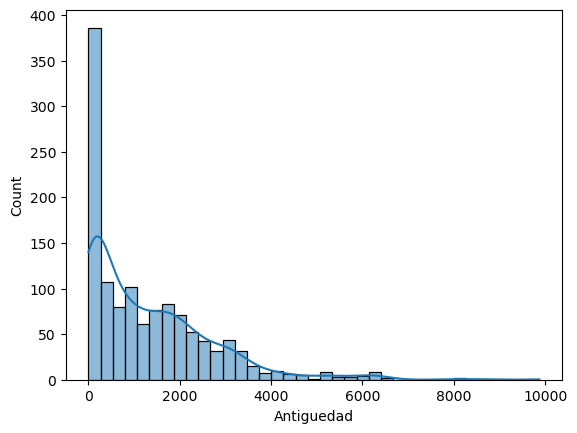

In [40]:
sns.histplot(data = df['Antiguedad'], kde = True, bins=37)

<Axes: xlabel='Antiguedad', ylabel='Count'>

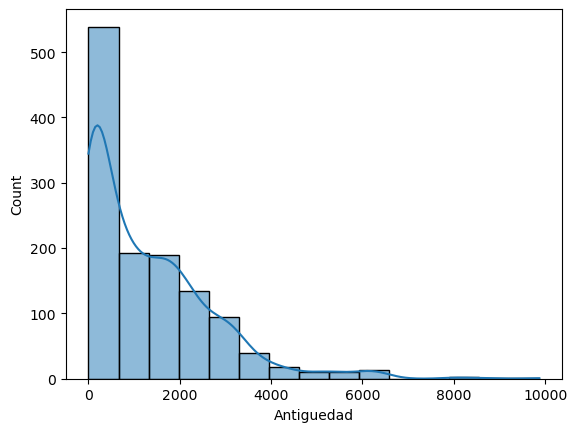

In [41]:
sns.histplot(data = df['Antiguedad'], kde = True, bins=15)